In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import calendar

from datetime import *
from bs4 import BeautifulSoup

In [6]:
date1 = datetime.strptime("2012-01-01", "%Y-%m-%d")
date2 = datetime.strptime("2023-1-1", "%Y-%m-%d")
date1 = date1.replace(day = 1)
date2 = date2.replace(day = 1)
months_str = calendar.month_name
months = []
while date1 < date2:
    month = date1.month
    month_str = month
    if month_str < 10:
        month_str = "0" + str(month_str)
    year  = date1.year
    months.append("{0}{1}".format(str(year), str(month_str)))
    next_month = month+1 if month != 12 else 1
    next_year = year + 1 if next_month == 1 else year
    date1 = date1.replace( month = next_month, year= next_year)


In [7]:
german_months = [
    "Januar", 
    "Februar",
    "maerz", 
    "Mai", 
    "Juni",
    "Juli", 
    "August", 
    "September", 
    "Oktober", 
    "November",
    "Dezember"
]

months = [x.lower() for x in german_months]

In [8]:
d = {}
avg = []
c = 0
year = 2022
for month in months:
    scrappedData = pd.DataFrame()
    html_text = requests.get("https://meteo.plus/wetterstatistik-bayern-" + month +".php#sonnenscheindauer").text
    soup = BeautifulSoup(html_text, 'lxml')


    for i in range(25):
        if i == 0 or i == 1:
            continue
        text = soup.find_all(id = 'ss_content')[0].find_all('table')[2].find_all("tr")[-i].find_all("td")[1].text
        avg.append(text)
        c += 1
        if c == 11:
            c = 0
            year -= 1
    

In [11]:
years = 23
months = 12
d = {}
curr_year = 2022
for rec in avg:
    if curr_year not in d:
        d[curr_year] = float(rec)
    else:
        d[curr_year] += float(rec)
    curr_year -= 1
    years -= 1
    if years == 0:
        curr_year = 2022
        years = 23

In [16]:
final_average_hours = pd.DataFrame.from_dict(pd.Series(d))
final_average_hours.rename( columns={0 :'avg_sun'}, inplace=True)

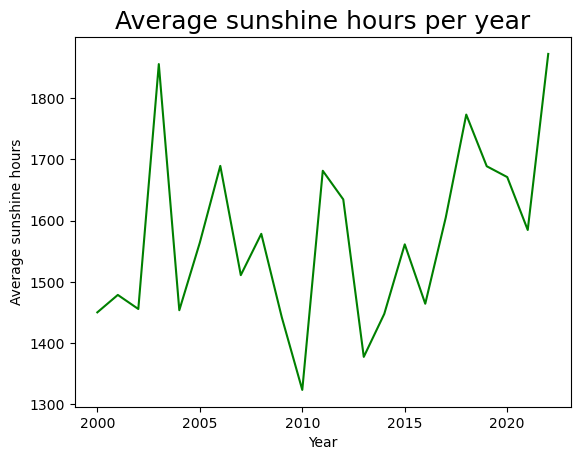

In [17]:
plt.plot(final_average_hours.index, final_average_hours["avg_sun"], label = "Gross Power", color = "g")
plt.ylabel('Average sunshine hours')
plt.xlabel('Year')
plt.title('Average sunshine hours per year', fontsize=18)
plt.savefig('final/10-AverageSun.PNG')